In [2]:
# ------------------------------------  1) DBSCAN --------------------



import pandas as pd, numpy as np

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
centers=[[.5,2],[-1,-1],[1.5,-1]]  #determine centroids centers(centers of 3 clusters)
X,y=make_blobs(n_samples=400,centers=centers,cluster_std=.5,random_state=0) # create dataset
# X->dataset ,y->cluster label
X=StandardScaler().fit_transform(X)# normalise the values

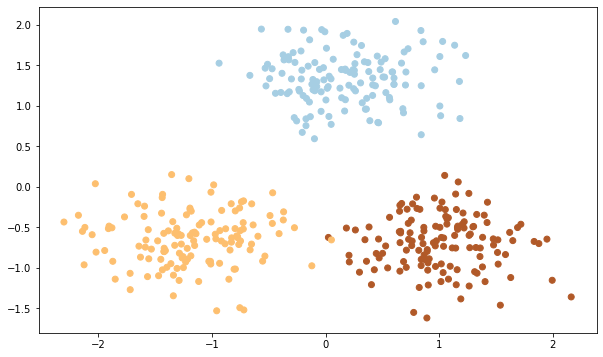

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='Paired')

In [5]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=.4,min_samples=20)

DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

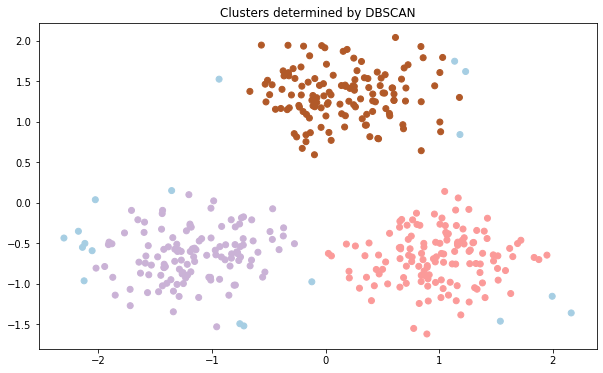

In [6]:
y_pred=db.fit_predict(X)#Perform DBSCAN clustering + return cluster labels.for noise point,cluster label=-1
#fit_pred()--> fit() {perform DBSCAN} + predict() {return cluster labels}
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
plt.title('Clusters determined by DBSCAN')

In [7]:
db.labels_[db.labels_==-1].size

18

In [8]:
db.labels_

array([ 0,  0,  1,  2,  2,  1,  1,  2,  0,  1,  0,  0,  2,  1,  0,  1,  1,
        2,  2,  2,  2,  0,  0,  0,  0,  2,  1,  2,  1, -1,  0,  1,  0,  0,
        0,  0,  0,  0,  1,  2,  2,  0,  2,  1,  0,  2,  2,  2,  0,  1, -1,
        2,  2,  1,  0,  1,  2,  2, -1,  2,  2,  1,  1,  2,  2,  1,  0,  1,
        2,  0,  1,  1,  2,  1,  0,  1,  2,  1,  0,  0,  2,  2,  1,  0,  2,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  2,  0,
        2,  1,  1,  2,  1,  2,  2,  0,  1,  1,  0,  1,  0,  0,  2,  0,  0,
        2,  0,  1,  2,  2,  1,  0,  1,  2,  0,  1,  1,  2,  1,  2,  1,  0,
        0,  2,  0,  0,  2,  1,  1,  1,  2, -1,  0,  0,  1,  0,  1,  1,  1,
        0,  0,  1,  1, -1,  2,  1,  2,  0,  2,  1,  0,  0,  1, -1, -1,  2,
        1,  2,  2,  0,  1,  0,  0,  1,  2,  2,  1,  2,  1,  0,  2,  1,  0,
        2,  0,  2,  2,  1,  1,  0,  2,  2,  1,  2,  0,  1,  2,  0, -1,  1,
        1,  2,  1,  2,  1, -1,  2,  0,  2,  0,  2,  1,  0,  2,  0, -1,  0,
       -1,  2,  0,  2,  1

In [11]:
y_pred[y_pred==-1].size

18

In [ ]:
#----------------------------------------   2) Kmeans---------------



In [21]:
centers=[[.5,2],[-1,-1],[1.5,-1]]
X,y=make_blobs(n_samples=400,centers=centers,cluster_std=.5,random_state=0)
X=StandardScaler().fit_transform(X)

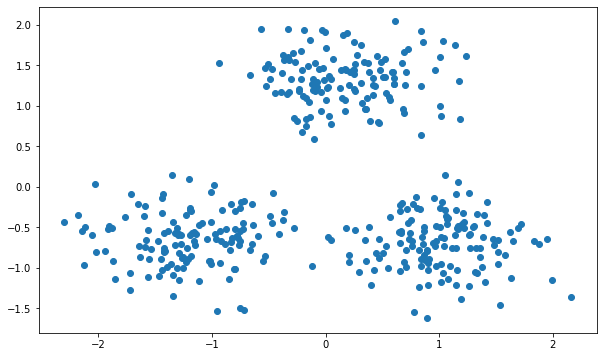

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],cmap='Paired')

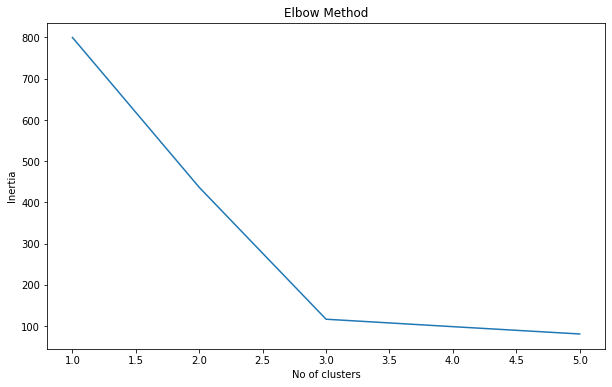

In [25]:
from sklearn.cluster import KMeans

#identifying optimal 'k' value  # optimal->best

individual_clustering_score=[]
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,random_state=58)
    kmeans.fit(X)   # perform Kmeans clustering on X
    individual_clustering_score.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,6),individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
individual_clustering_score

[800.0,
 436.48051590884364,
 116.78773896437113,
 98.7523459944495,
 81.01072752692393]

In [9]:
kmeans=KMeans(n_clusters=4,random_state=58)
kmeans.fit(X)
pred=kmeans.predict(X) # fit_predict() ->fit() + predict()
pred  # cluster label

array([2, 2, 1, 3, 3, 1, 1, 0, 2, 1, 2, 2, 3, 1, 2, 1, 1, 0, 3, 3, 0, 2,
       2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 0, 1,
       2, 0, 0, 3, 2, 1, 1, 3, 3, 1, 2, 1, 3, 0, 1, 3, 3, 1, 1, 3, 0, 1,
       2, 1, 0, 2, 1, 1, 3, 1, 2, 1, 3, 1, 2, 2, 0, 3, 1, 2, 3, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 3, 0, 2,
       1, 1, 2, 1, 2, 2, 0, 2, 2, 3, 2, 1, 3, 0, 1, 2, 1, 3, 2, 1, 1, 0,
       1, 3, 1, 2, 2, 3, 2, 2, 0, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 3, 0, 2, 1, 2,
       2, 1, 3, 0, 1, 0, 1, 2, 0, 1, 2, 3, 2, 3, 0, 1, 1, 2, 3, 3, 1, 0,
       2, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 3, 0, 2, 3, 2, 3, 1, 2, 3, 2, 0,
       2, 1, 0, 2, 3, 1, 1, 1, 1, 1, 0, 2, 2, 3, 2, 0, 2, 1, 3, 1, 2, 2,
       0, 1, 1, 0, 1, 1, 2, 2, 3, 0, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 2, 3,
       2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 3, 0, 0, 1, 2, 0, 3, 1, 0, 1, 0,
       3, 1, 2, 2, 3, 2, 1, 0, 0, 2, 2, 2, 3, 3, 2,

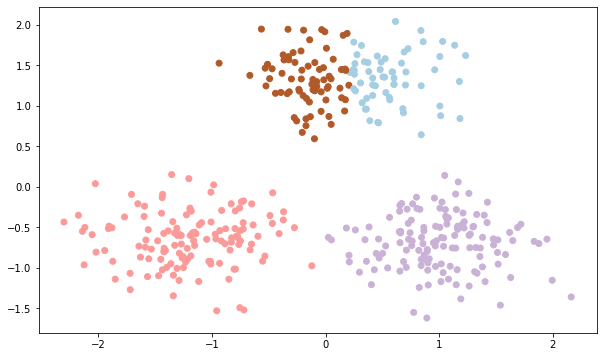

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=pred,cmap='Paired')

In [12]:
kmeans.cluster_centers_  # centroids of clusters

array([[ 0.57658295,  1.33721736],
       [-1.18953626, -0.64746694],
       [ 1.00259888, -0.69464199],
       [-0.16114108,  1.32857596]])

In [9]:
#-----------------------   3)Agglomerative clustering



X,y=make_blobs(n_samples=600,cluster_std=.5,random_state=0)
X=StandardScaler().fit_transform(X)

In [10]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,affinity="cosine",linkage='single')
#linkage->linking criteria(cluster forming method)
pred=agg.fit_predict(X)
pred

array([0, 0, 0, 3, 3, 0, 2, 2, 3, 2, 3, 2, 2, 2, 3, 0, 0, 0, 3, 3, 2, 3,
       0, 0, 2, 0, 0, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 3, 3, 3, 2, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0,
       2, 0, 3, 3, 0, 2, 3, 0, 3, 2, 3, 2, 0, 3, 3, 0, 3, 3, 3, 0, 2, 0,
       3, 3, 0, 2, 2, 0, 2, 2, 3, 0, 3, 2, 2, 0, 2, 3, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 3, 2, 0, 0, 3, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 2, 3, 0, 0,
       2, 3, 0, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0,
       3, 0, 2, 3, 0, 2, 3, 3, 3, 2, 2, 3, 3, 1, 3, 0, 3, 0, 2, 2, 0, 0,
       2, 0, 0, 3, 3, 0, 2, 3, 2, 3, 1, 0, 0, 2, 0, 2, 0, 0, 3, 2, 0, 2,
       0, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 3, 3, 0, 2, 0, 0, 2, 3, 0, 3, 2,
       0, 3, 3, 2, 3, 3, 3, 3, 0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 3, 2, 3, 3,
       2, 0, 3, 3, 2, 3, 3, 0, 3, 0, 2, 0, 2, 3, 0, 2, 0, 2, 3, 3, 3, 2,
       2, 3, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 0, 0, 0, 3,
       0, 2, 2, 0, 0, 3, 2, 3, 0, 2, 2, 2, 3, 2, 0,

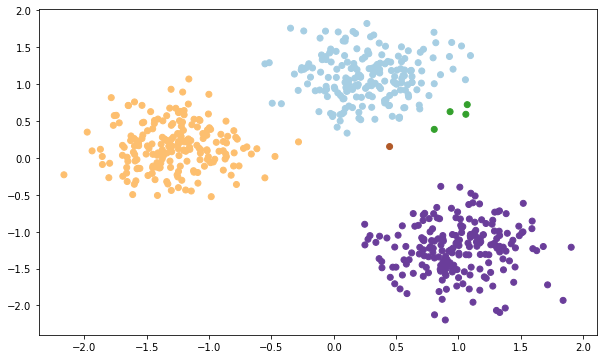

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=pred,cmap='Paired')

In [14]:
agg=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='complete')
pred=agg.fit_predict(X)

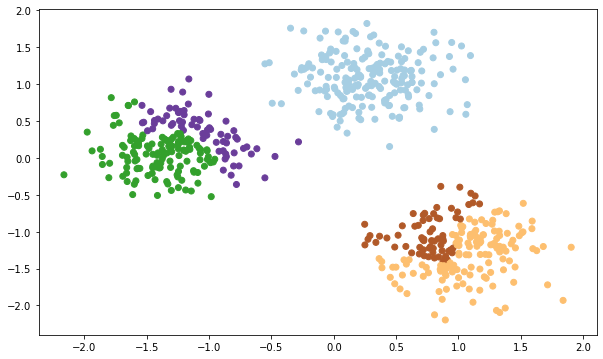

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=pred,cmap='Paired')